# Dataset Generation 

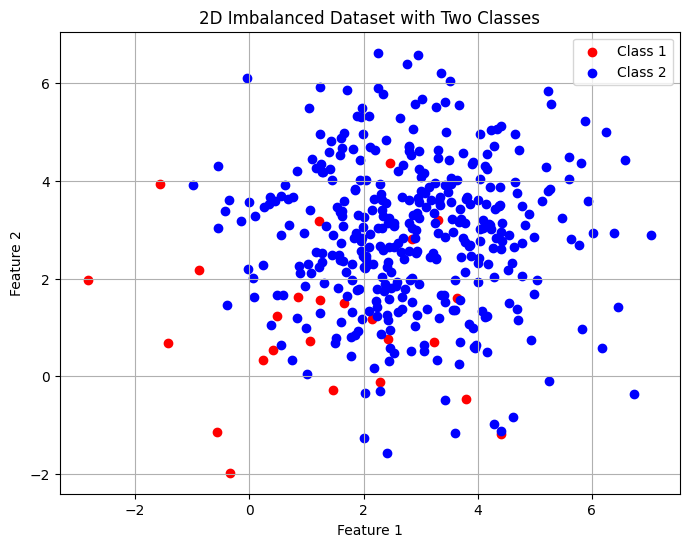

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd 
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,accuracy_score
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(1, 1), (3, 3)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

x, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# FOr Plotting Decision Boundary 

In [151]:
def plot_decision_boundaries_ros(X, y, model,name):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title(f"Decision Boundary (With {name} Method)")
    plt.show()

# Applying XGBOOst Without Balancing Data 

In [143]:
 x_train_ini,x_test_ini,y_train_ini,y_test_ini=train_test_split(x,y,random_state=95,test_size=0.25)


In [144]:
mdl=xgb.XGBClassifier(n_jobs=-1,n_estimators=400)
mdl.fit(x_train_ini,y_train_ini)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=-1, num_parallel_tree=None, ...)

In [145]:
print('Classification Report is=',classification_report(y_test_ini,mdl.predict(x_test_ini)))

Classification Report is=               precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.96      0.94      0.95        95

    accuracy                           0.90       100
   macro avg       0.55      0.57      0.56       100
weighted avg       0.92      0.90      0.91       100



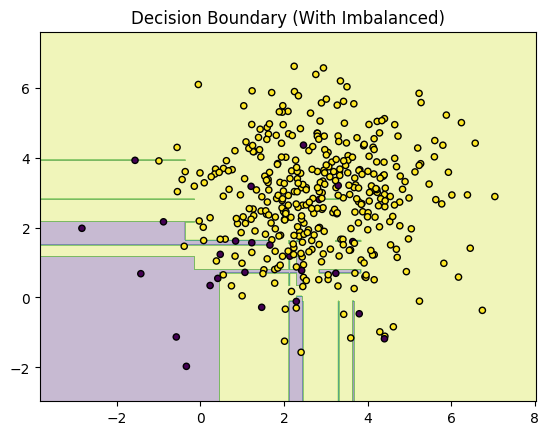

<Figure size 640x480 with 0 Axes>

In [150]:
plot_decision_boundaries_ros(x,y,mdl,'Imbalanced')
# plt.savefig('Decision BOundary With Imbalanced Dataset.png')

# Solution1- Using UnderSampling Method 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)


und=RandomUnderSampler(random_state=22)


x_train_und,y_train_und=und.fit_resample(x_train,y_train)


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x_train_und[y_train_und == 0][:, 0], x_train_und[y_train_und == 0][:, 1], color='red', label='Class 1')
plt.scatter(x_train_und[y_train_und == 1][:, 0], x_train_und[y_train_und == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
len(x_train_und)

In [ ]:
len(y_train_und)

In [ ]:
x_train_und

In [ ]:
pd.Series(y_train_und).value_counts()

In [ ]:
mdl2=xgb.XGBClassifier(n_jobs=-1,n_estimators=400)
mdl2.fit(x_train_und,y_train_und)

In [ ]:
print('Classification Report is=',classification_report(y_test,mdl2.predict(x_test)))

In [ ]:
plot_decision_boundaries_ros(x,y,mdl2,'UnderSampling')
plt.savefig('Decision BOundary With Undersampled Dataset.png')

# Solution2 Using Random OverSampling 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)


ovr=RandomOverSampler(random_state=22)


x_train_ovr,y_train_ovr=ovr.fit_resample(x_train,y_train)


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x_train_ovr[y_train_ovr == 0][:, 0], x_train_ovr[y_train_ovr == 0][:, 1], color='red', label='Class 1')
plt.scatter(x_train_ovr[y_train_ovr == 1][:, 0], x_train_ovr[y_train_ovr == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x_train.shape

In [ ]:
x_train_ovr.shape 

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
pd.Series(y_train_ovr).value_counts()

# Applying XBGOOst CLassifier  

In [ ]:
mdl3=xgb.XGBClassifier(n_jobs=-1,n_estimators=400)
mdl3.fit(x_train_ovr,y_train_ovr)

In [ ]:
print('Classification Report is=',classification_report(y_test,mdl3.predict(x_test)))

In [ ]:
plot_decision_boundaries_ros(x,y,mdl3,'Random Oversampling')
plt.savefig('Decision BOundary With OverSampled Dataset.png')

# Applying SMOTE Technique 

In [ ]:
from imblearn.over_sampling import  SMOTE

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)


smote=SMOTE(random_state=92)

x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x_train_smote[y_train_smote == 0][:, 0], x_train_smote[y_train_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(x_train_smote[y_train_smote == 1][:, 0], x_train_smote[y_train_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pd.Series(y_train_smote).value_counts()

In [ ]:
pd.Series(y_train).value_counts()

# Applying XBGOost Algorithm 

In [ ]:
mdl4=xgb.XGBClassifier(n_jobs=-1,n_estimators=400)
mdl4.fit(x_train_smote,y_train_smote)

In [ ]:
print('Classification Report is=',classification_report(y_test,mdl4.predict(x_test)))

# Displaying All the Classification Reports 

In [ ]:
print('Classification Report is=',classification_report(y_test_ini,mdl.predict(x_test_ini)))

In [ ]:
print('Classification Report is=',classification_report(y_test,mdl2.predict(x_test)))

In [ ]:
print('Classification Report is=',classification_report(y_test,mdl3.predict(x_test)))

In [ ]:
print('Classification Report is=',classification_report(y_test,mdl4.predict(x_test)))

# Plotting Decision Boundary 

In [ ]:
plot_decision_boundaries_ros(x,y,mdl4,'SMOTE')
plt.savefig('Decision BOundary Using SMOTE.png')

# Solution 4 Using Balanced Random Forest 

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

brf=BalancedRandomForestClassifier(n_estimators=400,n_jobs=-1,verbose=True,random_state=92)

brf.fit(x_train,y_train)


In [ ]:
plot_decision_boundaries_ros(x,y,brf,"Balanced Random Forest")
plt.savefig('Decision Boundary WIth Balanced Random Forest.png')

In [ ]:
print('Classification Report is=',classification_report(y_test,brf.predict(x_test)))

# Solution 5 Using Cost Sensitive Learning 

# Using Class Weights 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

lr=LogisticRegression(class_weight={0:90,1:2},solver='liblinear',random_state=92)
lr.fit(x_train,y_train)

In [ ]:
print('Classification Report is=',classification_report(y_test,lr.predict(x_test)))

In [ ]:
plot_decision_boundaries_ros(x,y,lr,'Cost Sensitive Learning A Class Weights')
plt.savefig('Decision Boundary with Class Weights on LR.png')

In [ ]:
print(np.unique(y))

In [ ]:
print(pd.Series(y).value_counts())

# Playing With the Different Types of SMOTES

# Applying ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=32)

adasyn=ADASYN(random_state=92)
x_train_ada,y_train_ada=adasyn.fit_resample(x_train,y_train)


In [ ]:
lr2=LogisticRegression()
lr2.fit(x_train_ada,y_train_ada)

In [ ]:
plot_decision_boundaries_ros(x,y,lr2,'adasyn')
plt.savefig('Decision Boundary With ADASYN SMOTE.png')

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
pd.Series(y_train_ada).value_counts()

In [ ]:
print('Classification Report is=',classification_report(y_test,lr2.predict(x_test)))

# Applying BorderLine SMOTE 

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=32)

brl_smote=BorderlineSMOTE()
x_train_brl,y_train_brl=brl_smote.fit_resample(x_train,y_train)

x_train_ada_brl,y_train_ada_brl=brl_smote.fit_resample(x_train_ada,y_train_ada)


In [ ]:
lr3=LogisticRegression(random_state=92)
lr3.fit(x_train_brl,y_train_brl)

In [ ]:
lr4=LogisticRegression(random_state=92)
lr4.fit(x_train_ada_brl,y_train_ada_brl)


In [ ]:
plot_decision_boundaries_ros(x,y,lr3,'BorderLine SMOTE')
plt.savefig('Decision Boundary With BorderLine SMOTE.png')

In [ ]:
plot_decision_boundaries_ros(x,y,lr4,'BorderlineSMOTE applied After ADASYN')

plt.savefig('Decision Boundary With BorderLine Smote after ADASYN SMOTE.png')

In [ ]:
print('Classification Report is=',classification_report(y_test,lr3.predict(x_test)))
print('Classification Report is=',classification_report(y_test,lr4.predict(x_test)))

# Applying SMOTE ENN 

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

smote_enn=SMOTEENN(n_jobs=-1,random_state=42)
x_train_smote_enn,y_train_smote_enn=smote_enn.fit_resample(x_train,y_train)

x_train_brl_smote_enn,y_train_brl_smote_enn=smote_enn.fit_resample(x_train_brl,y_train_brl)

In [ ]:
lr5=LogisticRegression(random_state=92)
lr5.fit(x_train_smote_enn,y_train_smote_enn)


In [ ]:
lr6=LogisticRegression(random_state=92)
lr6.fit(x_train_brl_smote_enn,y_train_brl_smote_enn)

In [ ]:
plot_decision_boundaries_ros(x,y,lr5,'SmoteENN')

plt.savefig('Decision Boundary With SMOTE ENN.png')

In [ ]:
plot_decision_boundaries_ros(x,y,lr6,'SmoteENN after BorderLine Smote')

plt.savefig('Decision Boundary With SMOTE ENN after BorderLine SMote.png')

In [ ]:
print('Classification Report is=',classification_report(y_test,lr5.predict(x_test)))
print('Classification Report is=',classification_report(y_test,lr6.predict(x_test)))

# Applying SMOTE TOMEK 

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

smote_tomek=SMOTETomek()
x_train_smote_tomek,y_train_smote_tomek=smote_tomek.fit_resample(x_train,y_train)

x_train_brl_smote_tomek,y_train_brl_smote_tomek=smote_tomek.fit_resample(x_train_brl,y_train_brl)



In [ ]:
lr7=LogisticRegression(random_state=92)
lr7.fit(x_train_smote_tomek,y_train_smote_tomek)

In [ ]:
lr8=LogisticRegression(random_state=92)
lr8.fit(x_train_brl_smote_tomek,y_train_brl_smote_tomek)

In [ ]:
plot_decision_boundaries_ros(x,y,lr7,'Smote TOMEK')

plt.savefig('Decision Boundary With SMOTE Tomek.png')

In [ ]:
plot_decision_boundaries_ros(x,y,lr8,'SMOTE tomek after BorderLine SMOTE')

plt.savefig('Decision Boundary With SMOTE Tomek after Borderline Smote.png')

In [ ]:
x_train_ada_smote_enn,y_train_ada_smote_enn=smote_enn.fit_resample(x_train_ada,y_train_ada)

x_train_ada_smote_tomek,y_train_ada_smote_tomek=smote_tomek.fit_resample(x_train_ada,y_train_ada)


In [ ]:
lr9=LogisticRegression(random_state=92)
lr9.fit(x_train_ada_smote_enn,y_train_ada_smote_enn)

In [ ]:
lr10=LogisticRegression(random_state=92)
lr10.fit(x_train_ada_smote_tomek,y_train_ada_smote_tomek)

In [ ]:
plot_decision_boundaries_ros(x,y,lr9,'SMOTE ENN after ADASYN')

plt.savefig('Decision Boundary With SMOTE Enn after ADASYN.png')

In [ ]:
plot_decision_boundaries_ros(x,y,lr10,'SMOTE TOMEK after ADASYN')

plt.savefig('Decision Boundary With SMOTE TOMEK After ADASYN.png')